1. Regular expression\
https://ithelp.ithome.com.tw/articles/10222163
2. Problem: Chrome version with driver selenium\
Note: try to log in dcard with password and account\
https://sites.google.com/chromium.org/driver/downloads/version-selection?authuser=0

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from time import sleep
from bs4 import BeautifulSoup
import re
import sys
import requests
import json
import datetime
import pandas as pd

month2digit = {
    "Jan": "01", 
    "Feb": "02", 
    "Mar": "03", 
    "Apr": "04", 
    "May": "05", 
    "Jun": "06", 
    "Jul": "07", 
    "Aug": "08", 
    "Sep": "09", 
    "Oct": "10", 
    "Nov": "11", 
    "Dec": "12"}

In [ ]:
<a class="atm_cs_1urozh atm_c8_1csq7v7 atm_g3_1qqjw7d atm_7l_1pday2 atm_1938jqx_1yyfdc7 atm_2zt8x3_stnw88 atm_grwvqw_gknzbh atm_1ymp90q_idpfg4 atm_89ifzh_idpfg4 atm_1hh4tvs_1osqo2v atm_1054lsl_1osqo2v t1gihpsa" href="/f/stock/p/252727939" style="--1tanwrd: var(--color-text-dark); --9e00xz: 0;"><span>#分享 今天把卡了很久資金的爛</span><em class="atm_7l_olvwno atm_cd_4jg895 h132c27v">面</em><span></span><em class="atm_7l_olvwno atm_cd_4jg895 h132c27v">板</em><span>友達出清</span></a>

In [16]:
search = "面板"
url = f"https://www.dcard.tw/service/api/v2/posts/{search}"
a = requests.get(url)
a

<Response [403]>

In [17]:
url

'https://www.dcard.tw/service/api/v2/posts/面板'

In [ ]:
search = "面板"
url = f"https://www.dcard.tw/f"
a = requests.get(url)
soup = BeautifulSoup(a.content, "html.parser")
n = soup.find_all("a", {"href": re.compile("/bbs/Stock/M.")})
for i in n:
    print("---------------------------")
    print(url_ptt + i["href"])
    new = requests.get(url_ptt + i["href"])
    soup = BeautifulSoup(new.content, "html.parser")
    main = soup.find_all("div", {"id": ["main-content"]}) # main = soup.select(".f3.hl") Multiple class, and
    textsss = main[0].text
    # news
    news = textsss[textsss.find("原文內容")+5:textsss.find("心得/評論")]
    # date
    date = textsss[textsss.find("發布時間")+5:textsss.find("發布時間")+16]# date_str = re.findall('\d{4}/\d{2}/\d{2}', textsss)    
    date_alter = re.findall(r"([A-Z][a-z]{2}) ([A-Z][a-z]{2})(\s{1,2}\d{1,2}) (\d{2}:\d{2}:\d{2}) (\d{4})", textsss)
    if len(date_alter) > 0:
        date_alter = [pd.to_datetime(date_alter[0][4] + "/" + month2digit.get(date_alter[0][1]) + "/" + str(int(date_alter[0][2][1:])))]
    date = date_alter[0] if len(date_alter) > 0 else 0

    # comment
    comment = soup.find_all("span", {"class": ["push-content"]}) # main = soup.select(".f3.hl") Multiple class, and
    comment_li = []
    for i in comment:
        comment_li.append(i.text) 

    if date != 0:
        sentiment_data.update({date: [news.replace("\n", ""), comment_li]})
print(sentiment_data)

- Translate: https://ithelp.ithome.com.tw/articles/10235642
- finbert: https://www.qinglite.cn/doc/8383647825f7da85f

In [12]:
from googletrans import  Translator
import transformers
# transformers.__version__

text="群創拜電視面板出貨比重較高、且客戶結構較有利之賜，市場預期營運有機會提前轉盈"

translator = Translator()
result = translator.translate(text, dest='en').text
result

'Qunchuangbai TV panel shipments are high and the customer structure is more favorable. The market is expected to have a chance to turn in advance'

In [14]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

#首次运行，因为会下载FinBERT模型，耗时会比较久
senti_finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
senti_tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
senti_nlp = pipeline("text-classification", model=senti_finbert, tokenizer=senti_tokenizer)

senti_results = senti_nlp(result)
senti_results

[{'label': 'Positive', 'score': 1.0}]

In [3]:
search = "面板"
url = f"https://www.ptt.cc/bbs/Stock/search?q={search}"

options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
# options.add_argument('--incognito')
# options.add_argument('headless')                        
driver = webdriver.Chrome(chrome_options=options)
driver.get(url)

C:\Users\USER\AppData\Local\Temp\ipykernel_1312\320457321.py:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=options)


In [18]:
# main = soup.select(".f3.hl") Multiple class, and

'https://www.ptt.cc/bbs/Stock/M.1688608531.A.191.html'

In [34]:
search = "半導體"

options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--proxy-server=101.9.200.184')
# options.add_argument('--incognito')
# options.add_argument('headless')                        
driver = webdriver.Chrome(chrome_options=options)
url = "https://www.digitimes.com.tw/tech/lgn/lgn.asp?tourl=/index.asp?"
driver.get(url)
driver.set_page_load_timeout(60)
username = "107208015@nccu.edu.tw"
password = "Champion2020"
driver.find_element(by=By.ID, value="checkid").send_keys(username)
driver.find_element(by=By.ID, value="checkpwd").send_keys(password)
driver.find_element(by=By.ID, value="add").click()
driver.find_element(by=By.ID, value="search-btn").click()
driver.find_element(by=By.ID, value="search_input").send_keys(search)

C:\Users\USER\AppData\Local\Temp\ipykernel_35232\3108961656.py:8: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=options)


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="checkid"]"}
  (Session info: chrome=114.0.5735.199)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0048A813+48355]
	(No symbol) [0x0041C4B1]
	(No symbol) [0x00325358]
	(No symbol) [0x003509A5]
	(No symbol) [0x00350B3B]
	(No symbol) [0x0037E232]
	(No symbol) [0x0036A784]
	(No symbol) [0x0037C922]
	(No symbol) [0x0036A536]
	(No symbol) [0x003482DC]
	(No symbol) [0x003493DD]
	GetHandleVerifier [0x006EAABD+2539405]
	GetHandleVerifier [0x0072A78F+2800735]
	GetHandleVerifier [0x0072456C+2775612]
	GetHandleVerifier [0x005151E0+616112]
	(No symbol) [0x00425F8C]
	(No symbol) [0x00422328]
	(No symbol) [0x0042240B]
	(No symbol) [0x00414FF7]
	BaseThreadInitThunk [0x76FB7D59+25]
	RtlInitializeExceptionChain [0x775CB74B+107]
	RtlClearBits [0x775CB6CF+191]


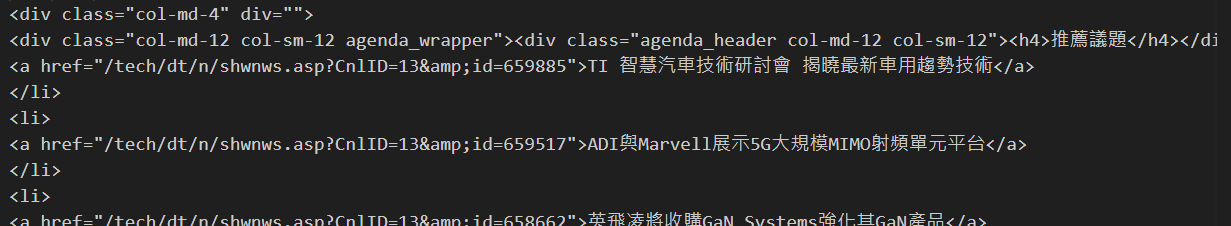

In [49]:
import re
url = "https://www.digitimes.com.tw/tech/lgn/lgn.asp?tourl=/tech/mypg/msg.asp?yErr=11&MyID=107208015@nccu.edu.tw"
page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")

soup.find_all()#{"href": re.compile("/tech/dt/")}
# driver.click()
# soup

[<html lang="zh-TW">
 <head>
 <!-- Google Tag Manager -->
 <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
 new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
 j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
 'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
 })(window,document,'script','dataLayer','GTM-T2QQLDQ');</script>
 <!-- End Google Tag Manager -->
 <!-- Google tag (gtag.js) -->
 <script async="" src="https://www.googletagmanager.com/gtag/js?id=AW-958258648"></script>
 <script>
   window.dataLayer = window.dataLayer || [];
   function gtag(){dataLayer.push(arguments);}
   gtag('js', new Date());
 
   gtag('config', 'AW-958258648');
 </script>
 <!--meta data-->
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="IE=11,IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
 <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalabl